In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
true_df = pd.read_csv('Resources/True.csv')  
fake_df = pd.read_csv('Resources/Fake.csv')  

In [3]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df["target"] = 1

In [6]:
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
fake_df["target"] = 0

In [8]:
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df = pd.concat([true_df, fake_df]).reset_index(drop = True)

In [10]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
true_or_fake = df.groupby(["target"]).agg({"title": "count"})

In [12]:
true_or_fake

,title
target,
0,23481
1,21417


In [13]:
true_or_fake_subject = df.groupby(["subject"]).agg({"title": "count"})

In [14]:
true_or_fake_subject

,title
subject,
Government News,1570
Middle-east,778
News,9050
US_News,783
left-news,4459
politics,6841
politicsNews,11272
worldnews,10145


In [15]:
df_clean = df[{"title", "target"}]

In [16]:
df_clean.head()

,target,title
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [17]:
#remove stopwords

stop = set(stopwords.words('english'))

df_clean["filtered"] = df_clean['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\maco_\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
df_clean.head()

,target,title,filtered
0,1,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip f..."
1,1,U.S. military to accept transgender recruits o...,U.S. military accept transgender recruits Mond...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped Australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service charge 'much more' ...


In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize 

In [20]:
df_clean["tokenised"] = df_clean['filtered'].apply(word_tokenize)

C:\Users\maco_\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_clean.head()

,target,title,filtered,tokenised
0,1,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip f...","[As, U.S., budget, fight, looms, ,, Republican..."
1,1,U.S. military to accept transgender recruits o...,U.S. military accept transgender recruits Mond...,"[U.S., military, accept, transgender, recruits..."
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,"[Senior, U.S., Republican, senator, :, 'Let, M..."
3,1,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped Australian diplomat ti...,"[FBI, Russia, probe, helped, Australian, diplo..."
4,1,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service charge 'much more' ...,"[Trump, wants, Postal, Service, charge, 'much,..."


In [22]:
from sklearn.model_selection import train_test_split
#X = df_clean["tokenised"]
#y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(df_clean["filtered"], df_clean["target"], random_state=0)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [24]:
X_train_vectorised = vect.transform(X_train)

X_train_vectorised

<33673x19144 sparse matrix of type '<class 'numpy.int64'>'
	with 376273 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorised, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

accuracy_value = roc_auc_score(y_test, predictions)

print('Area Under Curve Score: ', accuracy_value)

Area Under Curve Score:  0.9859686514130491


In [27]:
X_test.values[10]

'Russia hand suspect Montenegro coup attempt: RIA'

In [28]:
y_test.values[10]

1

In [29]:
#testing the model with X test data

model.predict(vect.transform(["Russia hand suspect Montenegro coup attempt: RIA"]))

array([1], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, predictions , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

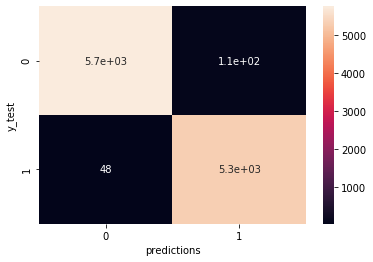

In [31]:
#plot the confusion matrix
import seaborn as sns 
ax= plt.subplot()
sns.heatmap(con_matrix, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')